# Zimbabwe Fire Extent Prediction

Datasets presents with information about regions in Zimbabwe with the percentage of area that has been burned in a given month.
Zimbabwe is split up into 533 equal areas, centered around the locations provided in the lat/lon columns. The target variable, burn_area, is the percentage of the area that has been burned in a given month.

## Pseudocodes


* import the necessary libraries
* import dataset
* check through for abnormalities and handle them all
* check for correlation
* print out your cleaned dataset
* train-test split
* build a machine learning model
* evaluate the performance

In [89]:
#importing the necessary library
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [90]:
#mounting google drive so i can use documents stored there
# from google.colab import drive
# drive.mount('/content/drive')

In [91]:
# #loading the variables definition document
# var = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Zindi Projects/fire-extent-prediction-challenge-120240716-19716-ztmgh3/variable_definitions.csv')
# var

In [92]:
#loading the variables definition document
var = pd.read_csv(r'C:\Users\pc\Desktop\pythonclass\Aptech\DataAnalytics\Zindi Projects\fire-extent-prediction-challenge-120240716-19716-ztmgh3\variable_definitions.csv')
var

,Variable,Description
0,ID,The IDs take the form of [area ID]_yyyy-mm-dd....
1,area,Area ID
2,date,The date that the data is aggregated over
3,lat,Latitude of the center of the area
4,lon,Longitude of the center of the area
5,burn_area,Percentage of the area burnt
6,climate_aet,"Actual evapotranspiration, derived using a one..."
7,climate_def,"Climate water deficit, derived using a one-dim..."
8,climate_pdsi,Palmer Drought Severity Index
9,climate_pet,Reference evapotranspiration (ASCE Penman-Mont...


In [93]:
#loading train dataset
train = pd.read_csv(r'C:\Users\pc\Desktop\pythonclass\Aptech\DataAnalytics\Zindi Projects\fire-extent-prediction-challenge-120240716-19716-ztmgh3\Train.csv')
train.head()

,ID,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
0,0_2001-01-01,-15.858835,29.237029,0.0,1195,0,263,1195,206,10,...,0.0,0.0,0.018654,0.0,0.714446,0.012174,0.244890,0.009836,0.0,0.256932
1,1_2001-01-01,-15.858835,29.487029,0.0,1196,0,232,1196,201,10,...,0.0,0.0,0.000000,0.0,0.654783,0.000095,0.345121,0.000000,0.0,0.273093
2,2_2001-01-01,-15.858835,29.737029,0.0,1190,0,314,1190,192,10,...,0.0,0.0,0.000000,0.0,0.516421,0.000000,0.483579,0.000000,0.0,0.285109
3,3_2001-01-01,-15.858835,29.987029,0.0,1144,0,321,1144,186,66,...,0.0,0.0,0.000000,0.0,0.299000,0.163902,0.537098,0.000000,0.0,0.298418
4,4_2001-01-01,-15.858835,30.237029,0.0,1187,0,413,1187,186,9,...,0.0,0.0,0.000000,0.0,0.277392,0.067742,0.654866,0.000000,0.0,0.315621


In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83148 entries, 0 to 83147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             83148 non-null  object 
 1   lat            83148 non-null  float64
 2   lon            83148 non-null  float64
 3   burn_area      83148 non-null  float64
 4   climate_aet    83148 non-null  int64  
 5   climate_def    83148 non-null  int64  
 6   climate_pdsi   83148 non-null  int64  
 7   climate_pet    83148 non-null  int64  
 8   climate_pr     83148 non-null  int64  
 9   climate_ro     83148 non-null  int64  
 10  climate_soil   83148 non-null  int64  
 11  climate_srad   83148 non-null  int64  
 12  climate_swe    83148 non-null  int64  
 13  climate_tmmn   83148 non-null  int64  
 14  climate_tmmx   83148 non-null  int64  
 15  climate_vap    83148 non-null  int64  
 16  climate_vpd    83148 non-null  int64  
 17  climate_vs     83148 non-null  int64  
 18  elevat

In [95]:
train.describe()

,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
count,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,...,83148.000000,83148.000000,83148.000000,8.314800e+04,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000
mean,-19.014557,29.860856,0.007632,484.491124,828.892721,-30.806237,1313.382992,54.576322,6.215134,305.477919,...,0.006158,0.000017,0.008583,4.066313e-08,0.160628,0.037453,0.785382,0.000354,0.001424,0.078551
std,1.588444,1.751090,0.029226,470.467480,546.934469,235.802930,315.209838,71.997561,21.480399,400.956123,...,0.053111,0.000141,0.059046,3.535121e-06,0.192957,0.106050,0.233953,0.001773,0.014233,0.104464
min,-22.358835,25.487029,0.000000,0.000000,0.000000,-563.000000,587.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000
25%,-20.358835,28.487029,0.000000,50.000000,375.000000,-212.000000,1081.000000,1.000000,0.000000,70.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.014993,0.000000,0.655322,0.000000,0.000000,0.002017
50%,-18.858835,29.987029,0.000000,302.000000,858.000000,-108.000000,1290.000000,22.000000,1.000000,149.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.076706,0.000139,0.880600,0.000000,0.000000,0.028503
75%,-17.858835,31.237029,0.000000,931.000000,1211.000000,142.000000,1517.000000,87.000000,4.000000,329.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.246498,0.015166,0.971209,0.000000,0.000000,0.125500
max,-15.858835,32.987029,0.843886,1713.000000,2614.000000,851.000000,2620.000000,501.000000,342.000000,3319.000000,...,0.828131,0.004918,0.711603,3.073689e-04,0.981472,0.881323,1.000000,0.016708,0.301823,0.801328


<Axes: >

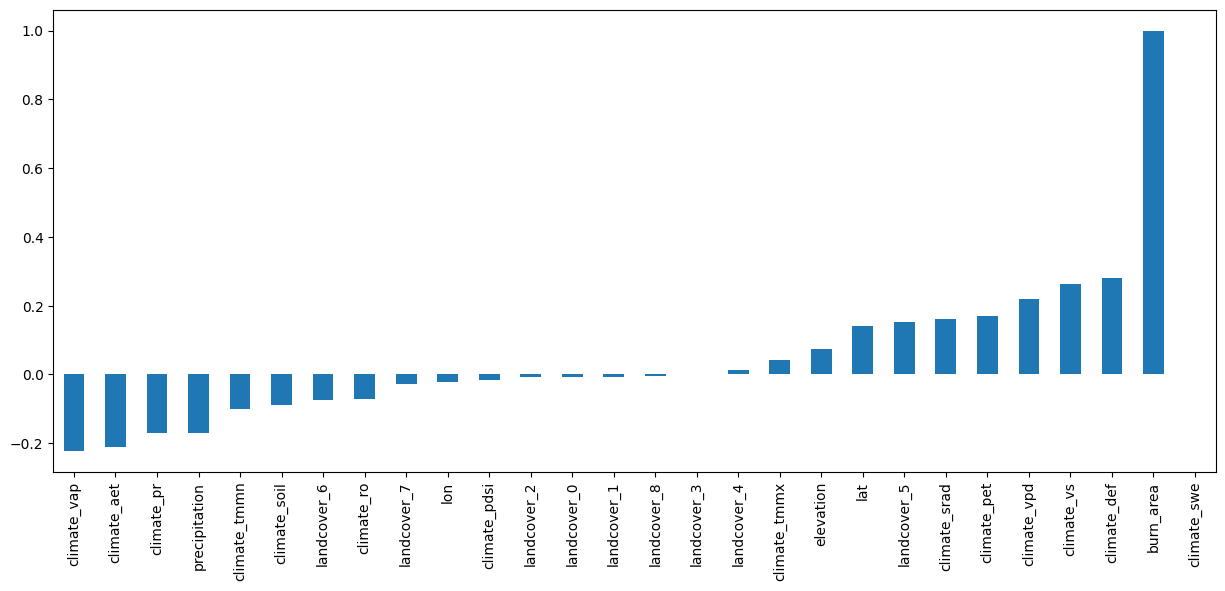

In [96]:
#doing a correlation using a bar chat of burn_area aginst other variables
num_train = train.select_dtypes(include='number').corr()
#selecting 'burn_area' to compare against other variables
num_train = num_train['burn_area']
#sorting the values in ascending order
num_train = num_train.sort_values()
#plotting a bar chart to see correlation
num_train.plot(kind='bar',figsize=(15,6))

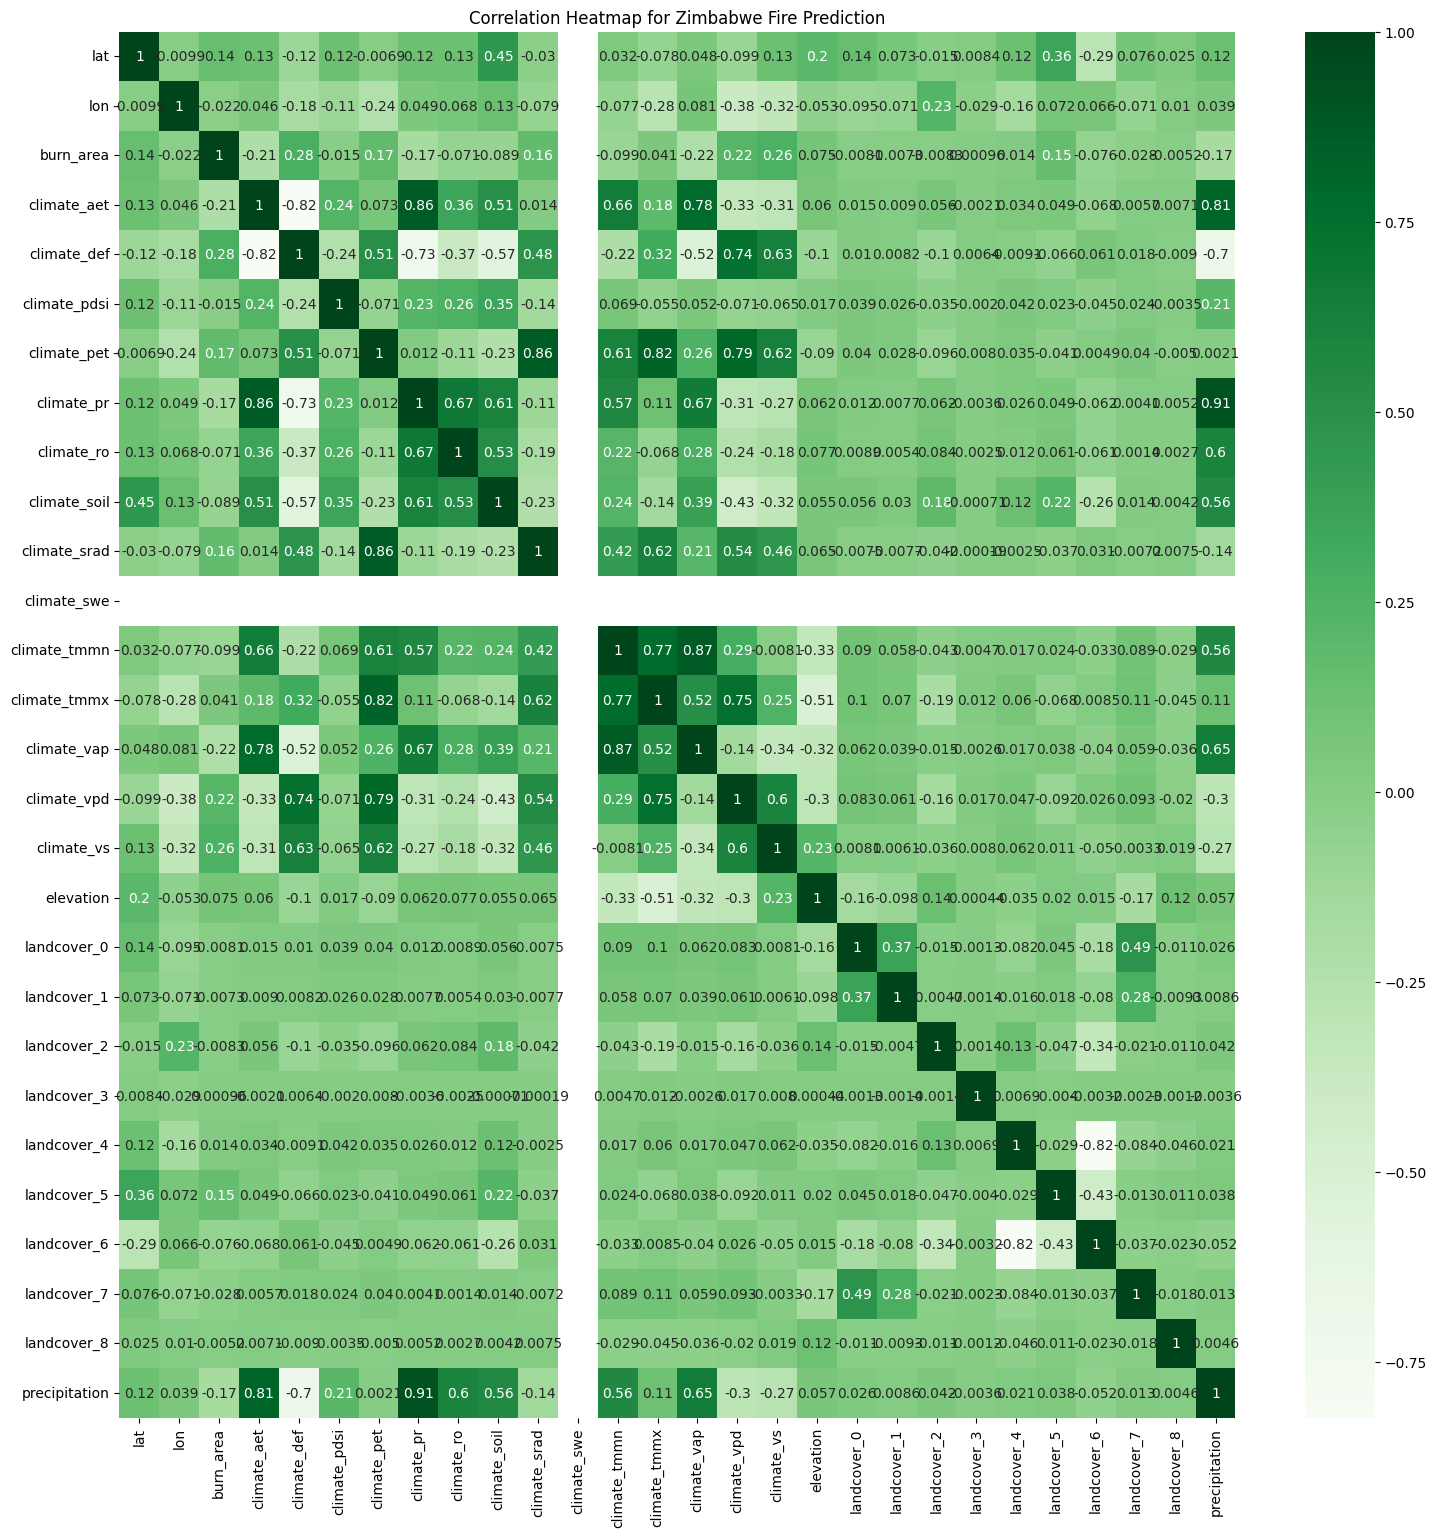

In [97]:
#plotting a heatmap to view correlation amongst all numeric variables
num_train = train.select_dtypes(include='number').corr()
#plotting heatmap
plt.figure(figsize=(18,18))
sb.heatmap(num_train, cmap='Greens',annot=True)
plt.title('Correlation Heatmap for Zimbabwe Fire Prediction')
plt.show()

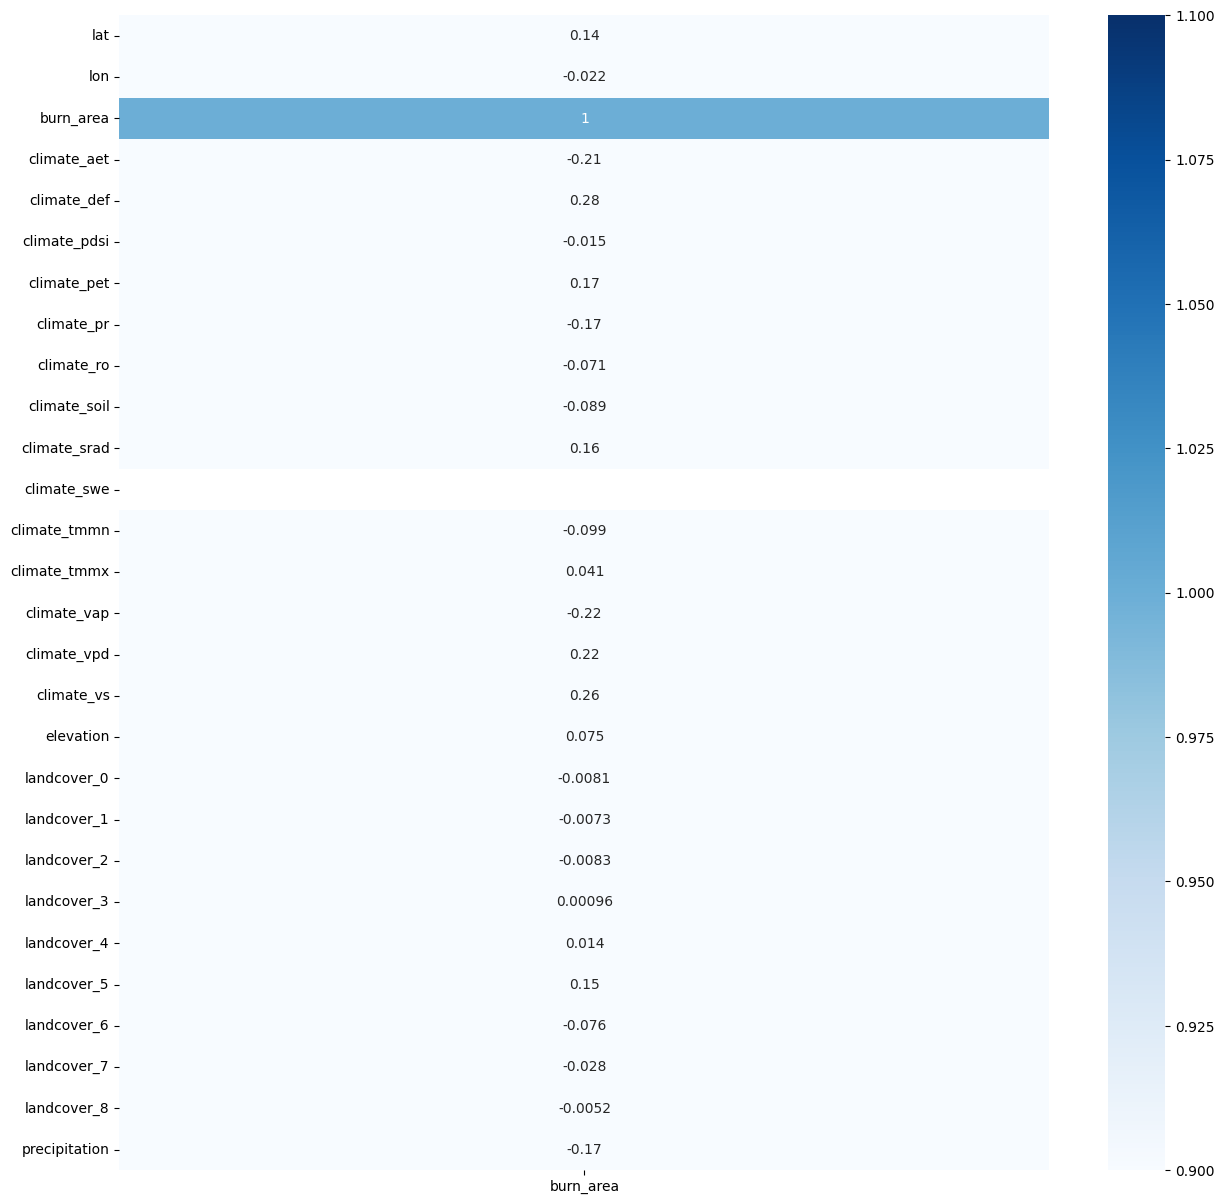

In [98]:
#plotting a heatmap of variables against burned area just to see which correlates to it
num_train = train.select_dtypes(include='number').corr()
burn_area_corr = num_train[['burn_area']]
#plotting heatmap
plt.figure(figsize=(15,15))
sb.heatmap(burn_area_corr, cmap='Blues',annot=True,vmin=1, vmax=1)
plt.show()

In [99]:
#checking to see why the 'climate_swe' column gives an empty bar in the heatmap
#nan, zero variance(same value),corr verification, plotting settings
#zero variance - if it returns 1, it has same values for all
print(train['climate_swe'].nunique())

1


In [100]:
train.climate_swe.unique().tolist()

[0]

## Doing a feature Engineering to select columms

* Splitting ID and Date coluns
* Dropping some columns - climate_swe and columns with very low correlation


In [102]:
#splitting ID and Date column
train[['ID', 'Date']] = train['ID'].str.split('_', expand=True, n=1)
train.head(0)

,ID,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation,Date


In [103]:
#splitting date into year, month and day
train[['Year', 'Month', 'Day']] = train['Date'].str.split('-', expand=True, n=2)
train.head()

,ID,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation,Date,Year,Month,Day
0,0,-15.858835,29.237029,0.0,1195,0,263,1195,206,10,...,0.714446,0.012174,0.244890,0.009836,0.0,0.256932,2001-01-01,2001,01,01
1,1,-15.858835,29.487029,0.0,1196,0,232,1196,201,10,...,0.654783,0.000095,0.345121,0.000000,0.0,0.273093,2001-01-01,2001,01,01
2,2,-15.858835,29.737029,0.0,1190,0,314,1190,192,10,...,0.516421,0.000000,0.483579,0.000000,0.0,0.285109,2001-01-01,2001,01,01
3,3,-15.858835,29.987029,0.0,1144,0,321,1144,186,66,...,0.299000,0.163902,0.537098,0.000000,0.0,0.298418,2001-01-01,2001,01,01
4,4,-15.858835,30.237029,0.0,1187,0,413,1187,186,9,...,0.277392,0.067742,0.654866,0.000000,0.0,0.315621,2001-01-01,2001,01,01


In [104]:
#dropping irrelevant column - Date
train.drop(['Date'], axis=1, inplace=True)
train.head(0)

,ID,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation,Year,Month,Day


In [105]:
train.Year.unique().tolist()

['2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [106]:
train.Year = train.Year.astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83148 entries, 0 to 83147
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             83148 non-null  object 
 1   lat            83148 non-null  float64
 2   lon            83148 non-null  float64
 3   burn_area      83148 non-null  float64
 4   climate_aet    83148 non-null  int64  
 5   climate_def    83148 non-null  int64  
 6   climate_pdsi   83148 non-null  int64  
 7   climate_pet    83148 non-null  int64  
 8   climate_pr     83148 non-null  int64  
 9   climate_ro     83148 non-null  int64  
 10  climate_soil   83148 non-null  int64  
 11  climate_srad   83148 non-null  int64  
 12  climate_swe    83148 non-null  int64  
 13  climate_tmmn   83148 non-null  int64  
 14  climate_tmmx   83148 non-null  int64  
 15  climate_vap    83148 non-null  int64  
 16  climate_vpd    83148 non-null  int64  
 17  climate_vs     83148 non-null  int64  
 18  elevat

In [107]:
# #using Year to check the distribution of the burn area and other parameters since year is consistent
# sb.pairplot(train, hue='Year').fig.title('Pairplot of Year against Other Variables')
# plt.show()

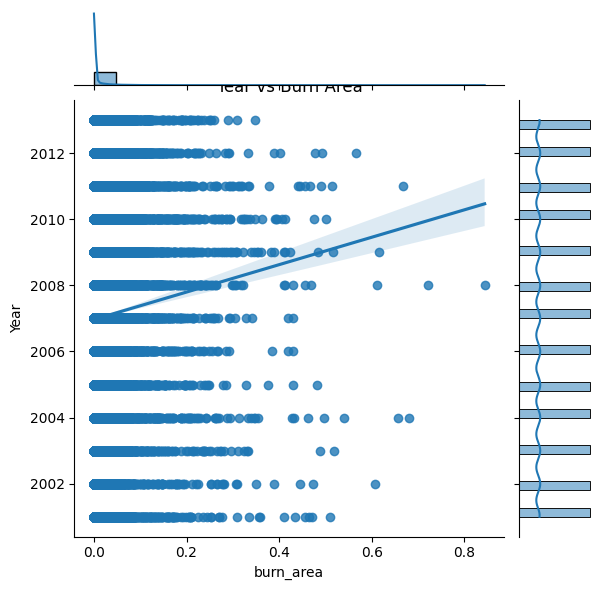

In [108]:
#creating a jointplot for year and other variables
sb.jointplot(y='Year', x='burn_area', data=train, kind='reg')
plt.title('Year vs Burn Area')
plt.show()

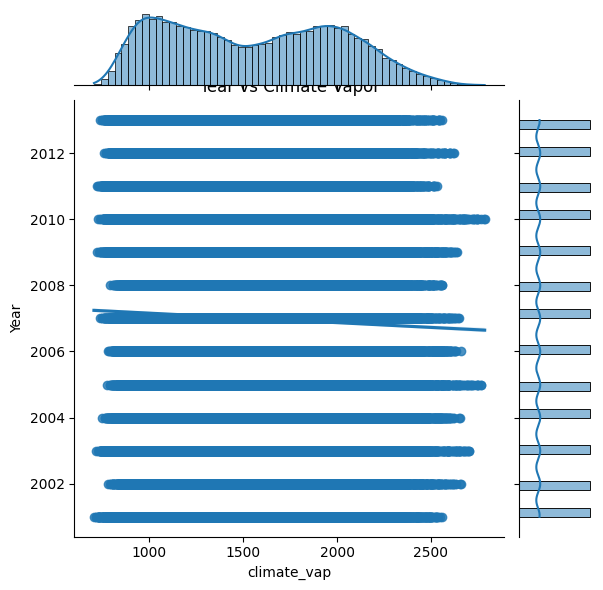

In [109]:
sb.jointplot(y='Year', x='climate_vap', data=train, kind='reg')
plt.title('Year vs Climate Vapor')
plt.show()

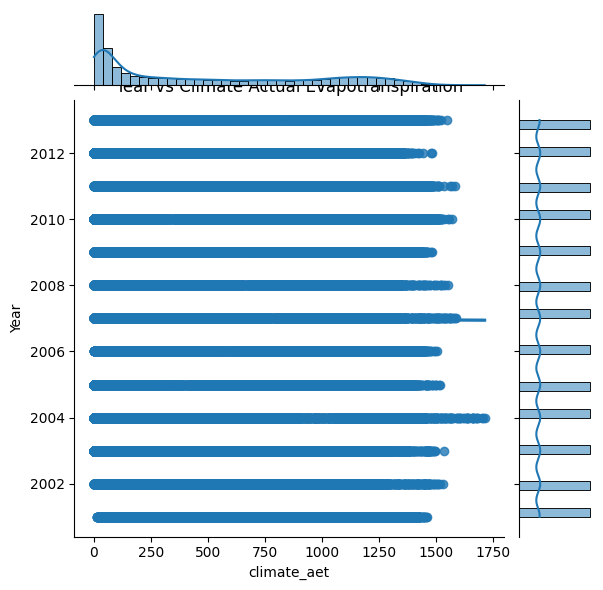

In [110]:
sb.jointplot(y='Year', x='climate_aet', data=train, kind='reg')
plt.title('Year vs Climate Actual Evapotranspiration')
plt.show()

In [111]:
train.skew()

ID                     0.0
lat              -0.054792
lon              -0.290142
burn_area         7.675599
climate_aet       0.583055
climate_def       0.089321
climate_pdsi       0.66101
climate_pet       0.417433
climate_pr        1.696194
climate_ro        6.600713
climate_soil      2.296452
climate_srad      0.022091
climate_swe            0.0
climate_tmmn     -0.310836
climate_tmmx     -0.224872
climate_vap       0.147505
climate_vpd       1.129643
climate_vs        0.237334
elevation        -0.310331
landcover_0      11.912567
landcover_1       14.93592
landcover_2       8.583332
landcover_3      86.926301
landcover_4       1.519589
landcover_5        4.30509
landcover_6       -1.25455
landcover_7        6.25424
landcover_8      17.026062
precipitation     1.735759
Year                   0.0
Month                  0.0
Day                    0.0
dtype: object

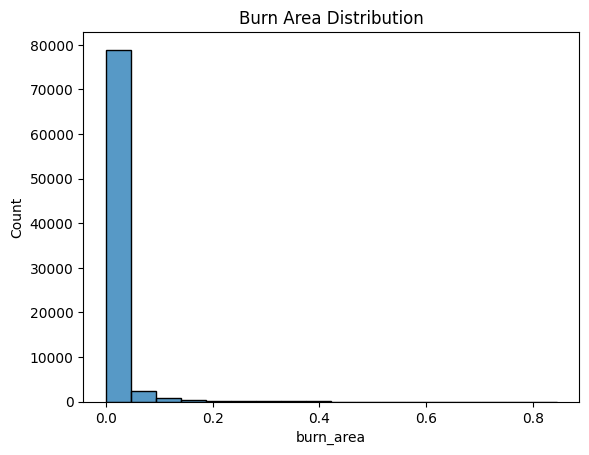

In [112]:
sb.histplot(train, x='burn_area')
plt.title('Burn Area Distribution')
plt.show()

In [113]:
print(train.Month.unique().tolist())
print(train.Day.unique().tolist())

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01']


In [1]:
# for col in train.columns:
#   print(f'Unique values in {col} is: {train[col].unique().tolist()}')

In [115]:
#casting Month to int
train.Month = train['Month'].astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83148 entries, 0 to 83147
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             83148 non-null  object 
 1   lat            83148 non-null  float64
 2   lon            83148 non-null  float64
 3   burn_area      83148 non-null  float64
 4   climate_aet    83148 non-null  int64  
 5   climate_def    83148 non-null  int64  
 6   climate_pdsi   83148 non-null  int64  
 7   climate_pet    83148 non-null  int64  
 8   climate_pr     83148 non-null  int64  
 9   climate_ro     83148 non-null  int64  
 10  climate_soil   83148 non-null  int64  
 11  climate_srad   83148 non-null  int64  
 12  climate_swe    83148 non-null  int64  
 13  climate_tmmn   83148 non-null  int64  
 14  climate_tmmx   83148 non-null  int64  
 15  climate_vap    83148 non-null  int64  
 16  climate_vpd    83148 non-null  int64  
 17  climate_vs     83148 non-null  int64  
 18  elevat

In [116]:
#dropping unique/non-useful columns
if 'climate_swe' in train.columns:
  train.drop(['climate_swe'], axis=1, inplace=True)
if 'Day' in train.columns:
  train.drop(['Day'], axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83148 entries, 0 to 83147
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             83148 non-null  object 
 1   lat            83148 non-null  float64
 2   lon            83148 non-null  float64
 3   burn_area      83148 non-null  float64
 4   climate_aet    83148 non-null  int64  
 5   climate_def    83148 non-null  int64  
 6   climate_pdsi   83148 non-null  int64  
 7   climate_pet    83148 non-null  int64  
 8   climate_pr     83148 non-null  int64  
 9   climate_ro     83148 non-null  int64  
 10  climate_soil   83148 non-null  int64  
 11  climate_srad   83148 non-null  int64  
 12  climate_tmmn   83148 non-null  int64  
 13  climate_tmmx   83148 non-null  int64  
 14  climate_vap    83148 non-null  int64  
 15  climate_vpd    83148 non-null  int64  
 16  climate_vs     83148 non-null  int64  
 17  elevation      83148 non-null  float64
 18  landco

In [117]:
#casting ID to int
train.ID = train['ID'].astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83148 entries, 0 to 83147
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             83148 non-null  int32  
 1   lat            83148 non-null  float64
 2   lon            83148 non-null  float64
 3   burn_area      83148 non-null  float64
 4   climate_aet    83148 non-null  int64  
 5   climate_def    83148 non-null  int64  
 6   climate_pdsi   83148 non-null  int64  
 7   climate_pet    83148 non-null  int64  
 8   climate_pr     83148 non-null  int64  
 9   climate_ro     83148 non-null  int64  
 10  climate_soil   83148 non-null  int64  
 11  climate_srad   83148 non-null  int64  
 12  climate_tmmn   83148 non-null  int64  
 13  climate_tmmx   83148 non-null  int64  
 14  climate_vap    83148 non-null  int64  
 15  climate_vpd    83148 non-null  int64  
 16  climate_vs     83148 non-null  int64  
 17  elevation      83148 non-null  float64
 18  landco

In [118]:
#to group by month and year and calculate the mean of the burn area
#this code groups by both month and year and finds the mean of each
# mean_monthly_burn = train.groupby(['Year', 'Month'])['burn_area'].mean()
# print(mean_monthly_burn)

In [119]:
#to group by month and year and calculate the mean of the burn area
mean_monthly_burn = train.groupby(['Month'])['burn_area']
mean_monthly_burn = mean_monthly_burn.mean()

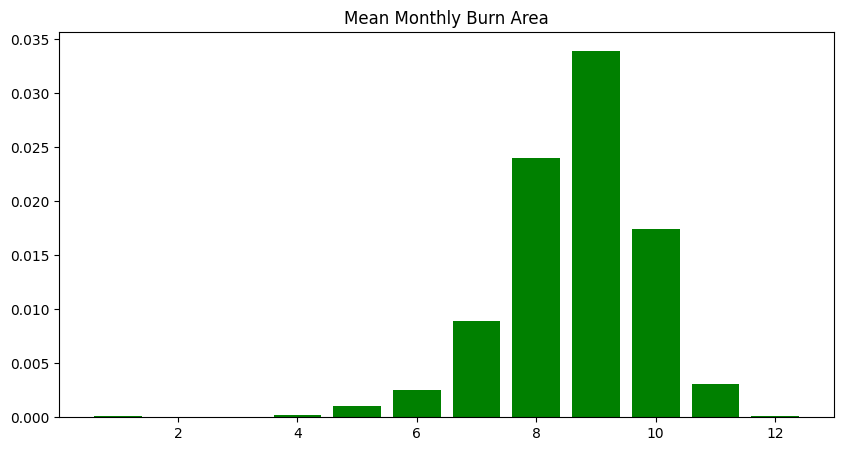

In [120]:
#plotting the mean monthly burn
plt.figure(figsize=(10,5))
plt.bar(mean_monthly_burn.index, mean_monthly_burn.values, color='Green')
plt.xlabel='Month'
plt.ylabel='Mean Burn Area'
plt.title('Mean Monthly Burn Area')
plt.show()

In [121]:
#to group by month and year and calculate the mean of the burn area
mean_yearly_burn = train.groupby(['Year'])['burn_area']
mean_yearly_burn = mean_yearly_burn.mean()

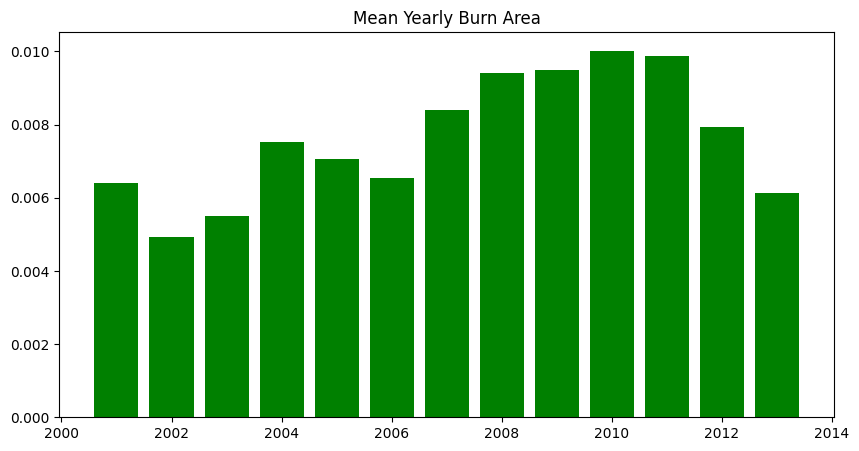

In [122]:
#plotting the graph
plt.figure(figsize=(10,5))
plt.bar(mean_yearly_burn.index, mean_yearly_burn.values, color='Green')
plt.xlabel='Year'
plt.ylabel='Mean Burn Area'
plt.title('Mean Yearly Burn Area')
plt.show()

### Doing a train split on train dataset

In [124]:
#splitting train dataset into <=2011(pre and during) and >2011(post)
trained = train[train['Year'] <= 2011]
test = train[train['Year'] > 2011]
print(trained.shape)
print(test.shape)

(70356, 30)
(12792, 30)


In [125]:
#defining our data and predictor
# x = train.drop(['burn_area'], axis=1)
# y = train['burn_area']

In [126]:
#assigning the predictor and data to train and test
# Get our X and y training and validation sets ready
x_train = trained.drop(['burn_area'], axis=1)
x_test = test.drop(['burn_area'], axis=1)

y_train = trained['burn_area']
y_test = test['burn_area']

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70356, 29)
(12792, 29)
(70356,)
(12792,)


In [127]:
#making a prediction using Linear regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [128]:
#creating model and fitting it
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [129]:
#making prediction
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

#calculating r2score and mse and rme
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R2 Score for Train: {r2_train}')
print(f'R2 Score for Test: {r2_test}')
#mse
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE for Train: {mse_train}')
print(f'MSE for Test: {mse_test}')
#using np.sqrt or **0.5 to find RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'RMSE for Train: {rmse_train}')
print(f'RMSE for Test: {rmse_test}')

R2 Score for Train: 0.15741427495841487
R2 Score for Test: 0.13000213261464255
MSE for Train: 0.0007475146798170963
MSE for Test: 0.0005847600652493477
RMSE for Train: 0.027340714691044495
RMSE for Test: 0.024181812695688216


In [130]:
#using ridge
ridge = Ridge(alpha=0.01)
ridge.fit(x_train,y_train)

Ridge(alpha=0.01)

In [131]:
#making prediction
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)

#calculating r2score and mse and rme
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R2 Score for Train: {r2_train}')
print(f'R2 Score for Test: {r2_test}')
#mse
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE for Train: {mse_train}')
print(f'MSE for Test: {mse_test}')
#using np.sqrt or **0.5 to find RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'RMSE for Train: {rmse_train}')
print(f'RMSE for Test: {rmse_test}')

R2 Score for Train: 0.15741261780884785
R2 Score for Test: 0.12998917017996814
MSE for Train: 0.0007475161499863516
MSE for Test: 0.0005847687778157001
RMSE for Train: 0.027340741577110736
RMSE for Test: 0.02418199284210671


In [132]:
#using lasso
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

Lasso(alpha=0.01)

In [133]:
#making prediction
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)

#calculating r2score and mse and rme
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R2 Score for Train: {r2_train}')
print(f'R2 Score for Test: {r2_test}')
#mse
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE for Train: {mse_train}')
print(f'MSE for Test: {mse_test}')
#using np.sqrt or **0.5 to find RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'RMSE for Train: {rmse_train}')
print(f'RMSE for Test: {rmse_test}')

R2 Score for Train: 0.13404393432191997
R2 Score for Test: 0.1327662482219919
MSE for Train: 0.0007682480867321537
MSE for Test: 0.0005829021935424113
RMSE for Train: 0.02771728858911264
RMSE for Test: 0.02414336748555204


In [134]:
#using ElasticNet
en = ElasticNet(alpha=0.01)
en.fit(x_train,y_train)

ElasticNet(alpha=0.01)

In [135]:
#making prediction
y_train_pred = en.predict(x_train)
y_test_pred = en.predict(x_test)

#calculating r2score and mse and rme
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R2 Score for Train: {r2_train}')
print(f'R2 Score for Test: {r2_test}')
#mse
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE for Train: {mse_train}')
print(f'MSE for Test: {mse_test}')
#using np.sqrt or **0.5 to find RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'RMSE for Train: {rmse_train}')
print(f'RMSE for Test: {rmse_test}')

R2 Score for Train: 0.1350445931243237
R2 Score for Test: 0.13229053802044521
MSE for Train: 0.0007673603347538632
MSE for Test: 0.0005832219372325104
RMSE for Train: 0.027701269551301495
RMSE for Test: 0.02414998834849637


In [136]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [137]:
#usng decision tree
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [138]:
#making prediction
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

#calculating r2score and mse and rme
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R2 Score for Train: {r2_train}')
print(f'R2 Score for Test: {r2_test}')
#mse
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE for Train: {mse_train}')
print(f'MSE for Test: {mse_test}')
#using np.sqrt or **0.5 to find RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'RMSE for Train: {rmse_train}')
print(f'RMSE for Test: {rmse_test}')

R2 Score for Train: 0.28676727131981405
R2 Score for Test: 0.26597124592714705
MSE for Train: 0.0006327569040979537
MSE for Test: 0.000493369832522147
RMSE for Train: 0.02515465968956753
RMSE for Test: 0.022211929959419265


In [139]:
#using random forest regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=5)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [140]:
#making prediction
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

#calculating r2score and mse and rme
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R2 Score for Train: {r2_train}')
print(f'R2 Score for Test: {r2_test}')
#mse
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE for Train: {mse_train}')
print(f'MSE for Test: {mse_test}')
#using np.sqrt or **0.5 to find RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'RMSE for Train: {rmse_train}')
print(f'RMSE for Test: {rmse_test}')

R2 Score for Train: 0.32596326989733204
R2 Score for Test: 0.3143045809362617
MSE for Train: 0.0005979834876300463
MSE for Test: 0.0004608830814699983
RMSE for Train: 0.02445370089843348
RMSE for Test: 0.02146818766151438


In [141]:
#using a gradient boosting
gb = GradientBoostingRegressor(n_estimators=10, max_depth=5, alpha=0.01)
gb.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.01, max_depth=5, n_estimators=10)

In [142]:
#making prediction
y_train_pred = gb.predict(x_train)
y_test_pred = gb.predict(x_test)

#calculating r2score and mse and rme
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R2 Score for Train: {r2_train}')
print(f'R2 Score for Test: {r2_test}')
#mse
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE for Train: {mse_train}')
print(f'MSE for Test: {mse_test}')
#using np.sqrt or **0.5 to find RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'RMSE for Train: {rmse_train}')
print(f'RMSE for Test: {rmse_test}')

R2 Score for Train: 0.304911944631433
R2 Score for Test: 0.3181299088753148
MSE for Train: 0.0006166595394526516
MSE for Test: 0.00045831192687399513
RMSE for Train: 0.024832630538318964
RMSE for Test: 0.021408221011424446


In [143]:
#using adaboosting
ada  = AdaBoostRegressor(n_estimators=50, learning_rate=0.01)
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.01)

In [144]:
#making prediction
y_train_pred = ada.predict(x_train)
y_test_pred = ada.predict(x_test)

#calculating r2score and mse and rme
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R2 Score for Train: {r2_train}')
print(f'R2 Score for Test: {r2_test}')
#mse
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE for Train: {mse_train}')
print(f'MSE for Test: {mse_test}')
#using np.sqrt or **0.5 to find RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'RMSE for Train: {rmse_train}')
print(f'RMSE for Test: {rmse_test}')

R2 Score for Train: 0.20346765894464924
R2 Score for Test: 0.18198191814835551
MSE for Train: 0.0007066576138096408
MSE for Test: 0.0005498223902045909
RMSE for Train: 0.02658303244194764
RMSE for Test: 0.023448291839803403


In [145]:
#using bagging
bagg = BaggingRegressor(n_estimators=10, max_samples=0.5, max_features=0.5)
bagg.fit(x_train,y_train)

BaggingRegressor(max_features=0.5, max_samples=0.5)

In [146]:
#making prediction
y_train_pred = bagg.predict(x_train)
y_test_pred = bagg.predict(x_test)

#calculating r2score and mse and rme
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R2 Score for Train: {r2_train}')
print(f'R2 Score for Test: {r2_test}')
#mse
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE for Train: {mse_train}')
print(f'MSE for Test: {mse_test}')
#using np.sqrt or **0.5 to find RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'RMSE for Train: {rmse_train}')
print(f'RMSE for Test: {rmse_test}')

R2 Score for Train: 0.742693583955399
R2 Score for Test: 0.3043565139671869
MSE for Train: 0.0002282738924813516
MSE for Test: 0.0004675695717569502
RMSE for Train: 0.01510873563476943
RMSE for Test: 0.0216233570880414


In [147]:
#using xgb
xgb = XGBRegressor(n_estimators=100, learning_rate=0.01)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [148]:
#making prediction
y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)

#calculating r2score and mse and rme
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R2 Score for Train: {r2_train}')
print(f'R2 Score for Test: {r2_test}')
#mse
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE for Train: {mse_train}')
print(f'MSE for Test: {mse_test}')
#using np.sqrt or **0.5 to find RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'RMSE for Train: {rmse_train}')
print(f'RMSE for Test: {rmse_test}')

R2 Score for Train: 0.34151092708720265
R2 Score for Test: 0.33280340765256045
MSE for Train: 0.0005841901113114308
MSE for Test: 0.0004484492864882138
RMSE for Train: 0.024170025058146524
RMSE for Test: 0.021176621224553594


### Reading Test Data

In [161]:
rwtest = pd.read_csv(r'C:\Users\pc\Desktop\pythonclass\Aptech\DataAnalytics\Zindi Projects\fire-extent-prediction-challenge-120240716-19716-ztmgh3\Test.csv')
rwtest.head()

,ID,lat,lon,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
0,0_2014-01-01,-15.858835,29.237029,1146,74,-451,1220,120,6,212,...,0.0,0.000615,0.015418,0.0,0.416704,0.023724,0.530016,0.013524,0.0,0.404243
1,1_2014-01-01,-15.858835,29.487029,1118,98,-405,1216,117,6,330,...,0.0,0.000000,0.000000,0.0,0.406436,0.000446,0.593118,0.000000,0.0,0.421489
2,2_2014-01-01,-15.858835,29.737029,1067,137,-468,1204,111,6,194,...,0.0,0.000000,0.000000,0.0,0.254791,0.000000,0.745209,0.000000,0.0,0.419122
3,3_2014-01-01,-15.858835,29.987029,969,187,-533,1156,101,5,78,...,0.0,0.000000,0.000000,0.0,0.219340,0.182153,0.598507,0.000000,0.0,0.404596
4,4_2014-01-01,-15.858835,30.237029,927,270,-505,1197,96,5,139,...,0.0,0.000000,0.000000,0.0,0.220239,0.097748,0.682013,0.000000,0.0,0.371100


In [163]:
#repeating the aboe processes on the test data
#splitting ID and Date columns
rwtest[['ID', 'Date']] = rwtest['ID'].str.split('_', expand=True, n=1)
rwtest.head(0)

,ID,lat,lon,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,...,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation,Date


In [164]:
#splitting date into year, month and day
rwtest[['Year', 'Month', 'Day']] = rwtest['Date'].str.split('-', expand=True, n=2)
rwtest.head(0)

,ID,lat,lon,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,...,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation,Date,Year,Month,Day


In [165]:
#casting object variables to int
rwtest.Year = rwtest['Year'].astype(int)
rwtest.Month = rwtest['Month'].astype(int)
rwtest.ID = rwtest['ID'].astype(int)
rwtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25584 entries, 0 to 25583
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             25584 non-null  int32  
 1   lat            25584 non-null  float64
 2   lon            25584 non-null  float64
 3   climate_aet    25584 non-null  int64  
 4   climate_def    25584 non-null  int64  
 5   climate_pdsi   25584 non-null  int64  
 6   climate_pet    25584 non-null  int64  
 7   climate_pr     25584 non-null  int64  
 8   climate_ro     25584 non-null  int64  
 9   climate_soil   25584 non-null  int64  
 10  climate_srad   25584 non-null  int64  
 11  climate_swe    25584 non-null  int64  
 12  climate_tmmn   25584 non-null  int64  
 13  climate_tmmx   25584 non-null  int64  
 14  climate_vap    25584 non-null  int64  
 15  climate_vpd    25584 non-null  int64  
 16  climate_vs     25584 non-null  int64  
 17  elevation      25584 non-null  float64
 18  landco

In [166]:
#dropping irrelevant column - Date,day, climate_swe
if 'Date' in rwtest.columns:
  rwtest.drop(['Date'], axis=1, inplace=True)
#dropping unique/non-useful columns
if 'climate_swe' in rwtest.columns:
  rwtest.drop(['climate_swe'], axis=1, inplace=True)
if 'Day' in rwtest.columns:
  rwtest.drop(['Day'], axis=1, inplace=True)
rwtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25584 entries, 0 to 25583
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             25584 non-null  int32  
 1   lat            25584 non-null  float64
 2   lon            25584 non-null  float64
 3   climate_aet    25584 non-null  int64  
 4   climate_def    25584 non-null  int64  
 5   climate_pdsi   25584 non-null  int64  
 6   climate_pet    25584 non-null  int64  
 7   climate_pr     25584 non-null  int64  
 8   climate_ro     25584 non-null  int64  
 9   climate_soil   25584 non-null  int64  
 10  climate_srad   25584 non-null  int64  
 11  climate_tmmn   25584 non-null  int64  
 12  climate_tmmx   25584 non-null  int64  
 13  climate_vap    25584 non-null  int64  
 14  climate_vpd    25584 non-null  int64  
 15  climate_vs     25584 non-null  int64  
 16  elevation      25584 non-null  float64
 17  landcover_0    25584 non-null  float64
 18  landco

In [167]:
#making prediction on rwtest data
y_test_pred_rf = rf.predict(rwtest)
y_test_pred_tree = tree.predict(rwtest)
y_test_pred_xgb = xgb.predict(rwtest)
y_test_pred_gb = gb.predict(rwtest)

print(y_test_pred_rf)
print(y_test_pred_tree)
print(y_test_pred_xgb)
print(y_test_pred_gb)

# #calculating r2score and mse and rme
# r2_train = r2_score(y_train, y_train_pred)
# r2_test = r2_score(y_test, y_test_pred)
# print(f'R2 Score for Train: {r2_train}')
# print(f'R2 Score for Test: {r2_test}')
# #mse
# mse_train = mean_squared_error(y_train, y_train_pred)
# mse_test = mean_squared_error(y_test, y_test_pred)
# print(f'MSE for Train: {mse_train}')
# print(f'MSE for Test: {mse_test}')
# #using np.sqrt or **0.5 to find RMSE
# rmse_train = np.sqrt(mse_train)
# rmse_test = np.sqrt(mse_test)
# print(f'RMSE for Train: {rmse_train}')
# print(f'RMSE for Test: {rmse_test}')

[0.00014182 0.00014182 0.00014182 ... 0.00524906 0.00555007 0.01154271]
[0.00012781 0.00012781 0.00012781 ... 0.00640108 0.00640108 0.0049225 ]
[0.00312214 0.00289562 0.00320842 ... 0.00486908 0.00519357 0.01516825]
[0.00278876 0.00278876 0.00278876 ... 0.00419485 0.00541109 0.01296708]


In [179]:
ss = pd.read_csv(r'C:\Users\pc\Desktop\pythonclass\Aptech\DataAnalytics\Zindi Projects\fire-extent-prediction-challenge-120240716-19716-ztmgh3\SampleSubmission.csv')
ss.head()

,ID,burn_area
0,0_2014-01-01,0
1,1_2014-01-01,0
2,2_2014-01-01,0
3,3_2014-01-01,0
4,4_2014-01-01,0


In [181]:
# #equating the column names to the rf prediction
# ss['burn_area'] = y_test_pred_rf
# ss['burn_area'] = ss['burn_area'].clip(0,1)
# ss.head()

In [183]:
# #updating sample file for submission
# ss.to_csv('first_submission.csv', index=False)

## Doing Hyperparameter Tuning for Models

In [186]:
# #doing a hyperparameter tuning for random forest regressor
# from sklearn.model_selection import GridSearchCV
# params_grid = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
# grid_search = GridSearchCV(rf, params_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(x_train, y_train)
# #to  fing the best parameters
# best_params = grid_search.best_params_
# print(f'Best Parameters for Random Forest Regressor for this dataset: {best_params}')

In [192]:
# #doing a hyperparameter tuning for random forest regressor
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.experimental import enable_halving_search_cv
# params_dist = {'n_estimators': [50, 100], 'max_depth': [5, 10], 'min_samples_split': [2, 5]}
# random_search = RandomizedSearchCV(rf, param_distributions=params_dist, n_iter=5, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# random_search.fit(x_train, y_train)
# #to  fing the best parameters
# best_params = random_search.best_params_
# print(f'Best Parameters for Random Forest Regressor for this dataset: {best_params}')

In [ ]:
#doing a hyperparameter tuning for random forest regressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV
params_grid = {'n_estimators': [50, 100], 'max_depth': [5, 10], 'min_samples_split': [2, 5]}
halving_grid_search = HalvingGridSearchCV(rf, params_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
halving_grid_search.fit(x_train, y_train)
#to  fing the best parameters
best_params = halving_grid_search.best_params_
print(f'Best Parameters for Random Forest Regressor for this dataset: {best_params}')